In [3]:
%config Completer.use_jedi = False
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', family='Arial Unicode MS')
%matplotlib inline
plt.rcParams['axes.unicode_minus'] = False
import folium
import json
from glob import glob
import missingno as msno

In [4]:
df = pd.read_csv('./datas/industry_merged.csv', encoding='utf-8')
df.head()

,산업분류,년도,회사수 (개),매출액 (백만원),당기순이익 (백만원),영업이익 (백만원),경상이익 (백만원),매출액증가율 (%),매출액이익률 (%),납입자본이익률 (%),매출액경상이익률 (%),자기자본이익률 (%),총자본경상이익률 (%),시장규모,시총
0,건설업,2005,54,40785394,2029565,3096864,2885231,3.670,4.955,36.710,6.780,13.245,7.915,150470135,26444487
1,건설업,2006,57,44745972,2755247,3657870,3652228,12.410,5.850,46.305,7.950,14.790,8.855,153315180,33138291
2,건설업,2007,57,47834524,2802313,3566035,3718370,5.065,4.870,38.700,6.545,11.275,6.450,166693235,53907176
3,건설업,2008,56,53570702,3195413,3672975,4577360,16.480,4.120,37.405,6.090,9.690,5.475,180679909,22653768
4,건설업,2009,55,61989084,1812152,3385664,2769115,18.770,2.270,24.915,3.400,5.765,3.150,188031835,31828104


In [3]:
df.columns.unique()

Index(['산업분류', '년도', '회사수 (개)', '매출액 (백만원)', '당기순이익 (백만원)', '영업이익 (백만원)',
       '경상이익 (백만원)', '매출액증가율 (%)', '매출액이익률 (%)', '납입자본이익률 (%)', '매출액경상이익률 (%)',
       '자기자본이익률 (%)', '총자본경상이익률 (%)', '시장규모', '시총'],
      dtype='object')

In [4]:
df['산업분류'].unique()

array(['건설업', '광업', '기계', '기타제조업', '농업, 임업 및 어업', '비금속광물', '서비스업', '섬유의복',
       '운수장비', '운수창고업', '유통업', '음식료품', '의료·정밀기기', '의약품', '전기가스', '전기전자',
       '종이·목재', '철강금속', '통신업', '화학', '제조업'], dtype=object)

## 1.섹터 별 df 만들기

In [6]:
sector_ls = df['산업분류'].unique().tolist()
sector_ls

['건설업',
 '광업',
 '기계',
 '기타제조업',
 '농업, 임업 및 어업',
 '비금속광물',
 '서비스업',
 '섬유의복',
 '운수장비',
 '운수창고업',
 '유통업',
 '음식료품',
 '의료·정밀기기',
 '의약품',
 '전기가스',
 '전기전자',
 '종이·목재',
 '철강금속',
 '통신업',
 '화학',
 '제조업']

In [14]:
for idx, sector in enumerate(sector_ls):
    globals()['df_ind_{}'.format(idx)] = df[df['산업분류'] == sector]
    globals()['df_ind_{}'.format(idx)].reset_index(drop=True, inplace=True)

df_ind_20.tail()

,산업분류,년도,회사수 (개),매출액 (백만원),당기순이익 (백만원),영업이익 (백만원),경상이익 (백만원),매출액증가율 (%),매출액이익률 (%),납입자본이익률 (%),매출액경상이익률 (%),자기자본이익률 (%),총자본경상이익률 (%),시장규모,시총
9,제조업,2014,1091,811094558,43543459,54326334,55112505,3.246389,3.712083,48.622222,4.823611,4.212361,3.612778,1559629457,767831507
10,제조업,2015,1115,791176571,37063483,44929788,46930022,2.656667,4.110694,43.651944,5.283056,4.475972,3.655417,1432692898,825018921
11,제조업,2016,1162,775378712,36198535,46499201,45539207,3.529306,5.205556,54.430556,6.460278,4.926944,4.250556,1490319219,918986848
12,제조업,2017,1173,755685795,43059976,53106517,53978987,5.825278,3.981389,50.515139,5.843472,4.005694,3.914167,1591959873,1152141771
13,제조업,2018,1214,824698749,71941760,83499912,86557629,3.905417,4.742917,56.900972,6.016806,4.955556,4.008472,1631824545,921986364


## 2. 섹터별 norm df 만들어서 합 df 만들기

In [16]:
df_norm = pd.read_csv('./datas/norm_std.csv', encoding='utf-8')
df_norm.head()

,산업분류,년도,회사수 (개),매출액 (백만원),당기순이익 (백만원),영업이익 (백만원),경상이익 (백만원),매출액증가율 (%),매출액이익률 (%),납입자본이익률 (%),매출액경상이익률 (%),자기자본이익률 (%),총자본경상이익률 (%),시장규모,시총
0,건설업,2005,-0.542403,-1.998367,0.868508,0.579365,0.852371,-0.170437,1.187554,0.851819,1.184977,1.299236,1.351396,-1.193173,-0.319363
1,건설업,2006,0.881405,-1.610409,1.252618,0.972198,1.187412,0.927175,1.491725,1.209430,1.511661,1.501383,1.602943,-1.121211,0.511515
2,건설업,2007,0.881405,-1.307870,1.277530,0.907893,1.216305,0.004754,1.158666,0.925987,1.119361,1.041482,0.959357,-0.782831,3.089481
3,건설업,2008,0.406802,-0.745983,1.485602,0.982775,1.591530,1.438305,0.903774,0.877722,0.992318,0.834101,0.698444,-0.429057,-0.789891
4,건설업,2009,-0.067800,0.078639,0.753429,0.781592,0.801649,1.725894,0.275041,0.412212,0.241224,0.320557,0.076267,-0.243099,0.348886


In [18]:
sector_norm_ls = df_norm['산업분류'].unique().tolist()
sector_norm_ls

['건설업',
 '광업',
 '기계',
 '기타제조업',
 '농업, 임업 및 어업',
 '비금속광물',
 '서비스업',
 '섬유의복',
 '운수장비',
 '운수창고업',
 '유통업',
 '음식료품',
 '의료·정밀기기',
 '의약품',
 '전기가스',
 '전기전자',
 '종이·목재',
 '철강금속',
 '통신업',
 '화학']

In [50]:
df_norm_t = pd.DataFrame(columns=df_ind_20.columns[2:], index=df_ind_20['년도'][:14], data=0)
df_norm_t

,회사수 (개),매출액 (백만원),당기순이익 (백만원),영업이익 (백만원),경상이익 (백만원),매출액증가율 (%),매출액이익률 (%),납입자본이익률 (%),매출액경상이익률 (%),자기자본이익률 (%),총자본경상이익률 (%),시장규모,시총
년도,,,,,,,,,,,,,
2005,0,0,0,0,0,0,0,0,0,0,0,0,0
2006,0,0,0,0,0,0,0,0,0,0,0,0,0
2007,0,0,0,0,0,0,0,0,0,0,0,0,0
2008,0,0,0,0,0,0,0,0,0,0,0,0,0
2009,0,0,0,0,0,0,0,0,0,0,0,0,0
2010,0,0,0,0,0,0,0,0,0,0,0,0,0
2011,0,0,0,0,0,0,0,0,0,0,0,0,0
2012,0,0,0,0,0,0,0,0,0,0,0,0,0
2013,0,0,0,0,0,0,0,0,0,0,0,0,0


In [51]:
df_norm_t = df_norm_t.astype(float)
df_norm_t.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14 entries, 2005 to 2018
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   회사수 (개)       14 non-null     float64
 1   매출액 (백만원)     14 non-null     float64
 2   당기순이익 (백만원)   14 non-null     float64
 3   영업이익 (백만원)    14 non-null     float64
 4   경상이익 (백만원)    14 non-null     float64
 5   매출액증가율 (%)    14 non-null     float64
 6   매출액이익률 (%)    14 non-null     float64
 7   납입자본이익률 (%)   14 non-null     float64
 8   매출액경상이익률 (%)  14 non-null     float64
 9   자기자본이익률 (%)   14 non-null     float64
 10  총자본경상이익률 (%)  14 non-null     float64
 11  시장규모          14 non-null     float64
 12  시총            14 non-null     float64
dtypes: float64(13)
memory usage: 1.5 KB


In [57]:
for idx, sector in enumerate(sector_norm_ls):
    globals()['df_norm_ind_{}'.format(idx)] = df_norm[df_norm['산업분류'] == sector]
    globals()['df_norm_ind_{}'.format(idx)].drop(columns='산업분류', inplace=True)
    globals()['df_norm_ind_{}'.format(idx)].set_index('년도', inplace=True)

    df_norm_t = df_norm_t.add(globals()['df_norm_ind_{}'.format(idx)])
    
df_norm_to = df_norm_t / 20
df_norm_to

/Users/dockyum/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,회사수 (개),매출액 (백만원),당기순이익 (백만원),영업이익 (백만원),경상이익 (백만원),매출액증가율 (%),매출액이익률 (%),납입자본이익률 (%),매출액경상이익률 (%),자기자본이익률 (%),총자본경상이익률 (%),시장규모,시총
년도,,,,,,,,,,,,,
2005,-1.703312,-2.540504,-0.401717,-0.939226,-0.368475,0.678405,0.723541,-0.129528,0.954656,1.273652,1.392380,-3.110051,-2.046846
2006,-0.647273,-2.372576,-0.703572,-1.187101,-0.803617,0.035379,-0.298156,-0.850804,-0.113777,-0.033882,-0.052602,-2.695135,-1.423736
2007,-0.598308,-2.168225,-0.696723,-1.301439,-0.538697,-0.512716,-0.930467,-0.973784,-0.587764,-0.641974,-0.451657,-2.114733,0.533201
2008,-0.556016,-1.651098,-0.480689,-0.770624,-0.370368,1.029466,-1.963108,-1.759120,-1.817222,-1.849969,-1.717128,-1.017981,-2.036587
2009,-0.655301,-0.636620,-0.819428,0.138625,-0.831234,0.828568,-0.662307,-0.582376,-0.689186,-0.046242,-0.248465,-0.985067,-0.888809
2010,-0.824260,-0.447900,-0.129013,0.061617,-0.173045,0.507770,0.474828,0.322837,0.422462,0.614959,0.467324,-0.274425,-0.129639
2011,-0.098513,0.586254,1.344601,0.806074,1.313035,1.169598,1.343246,1.506851,1.501563,1.257817,1.461982,0.778483,-0.383360
2012,0.222298,1.061981,0.348829,0.446144,0.344082,0.539594,-0.278407,0.135706,-0.235174,-0.114897,-0.318445,0.944846,-0.218738
2013,0.322116,1.391957,-0.042406,0.005887,-0.124500,-0.595392,-0.552988,-0.456916,-0.650966,-0.572177,-0.679637,0.912401,0.032764


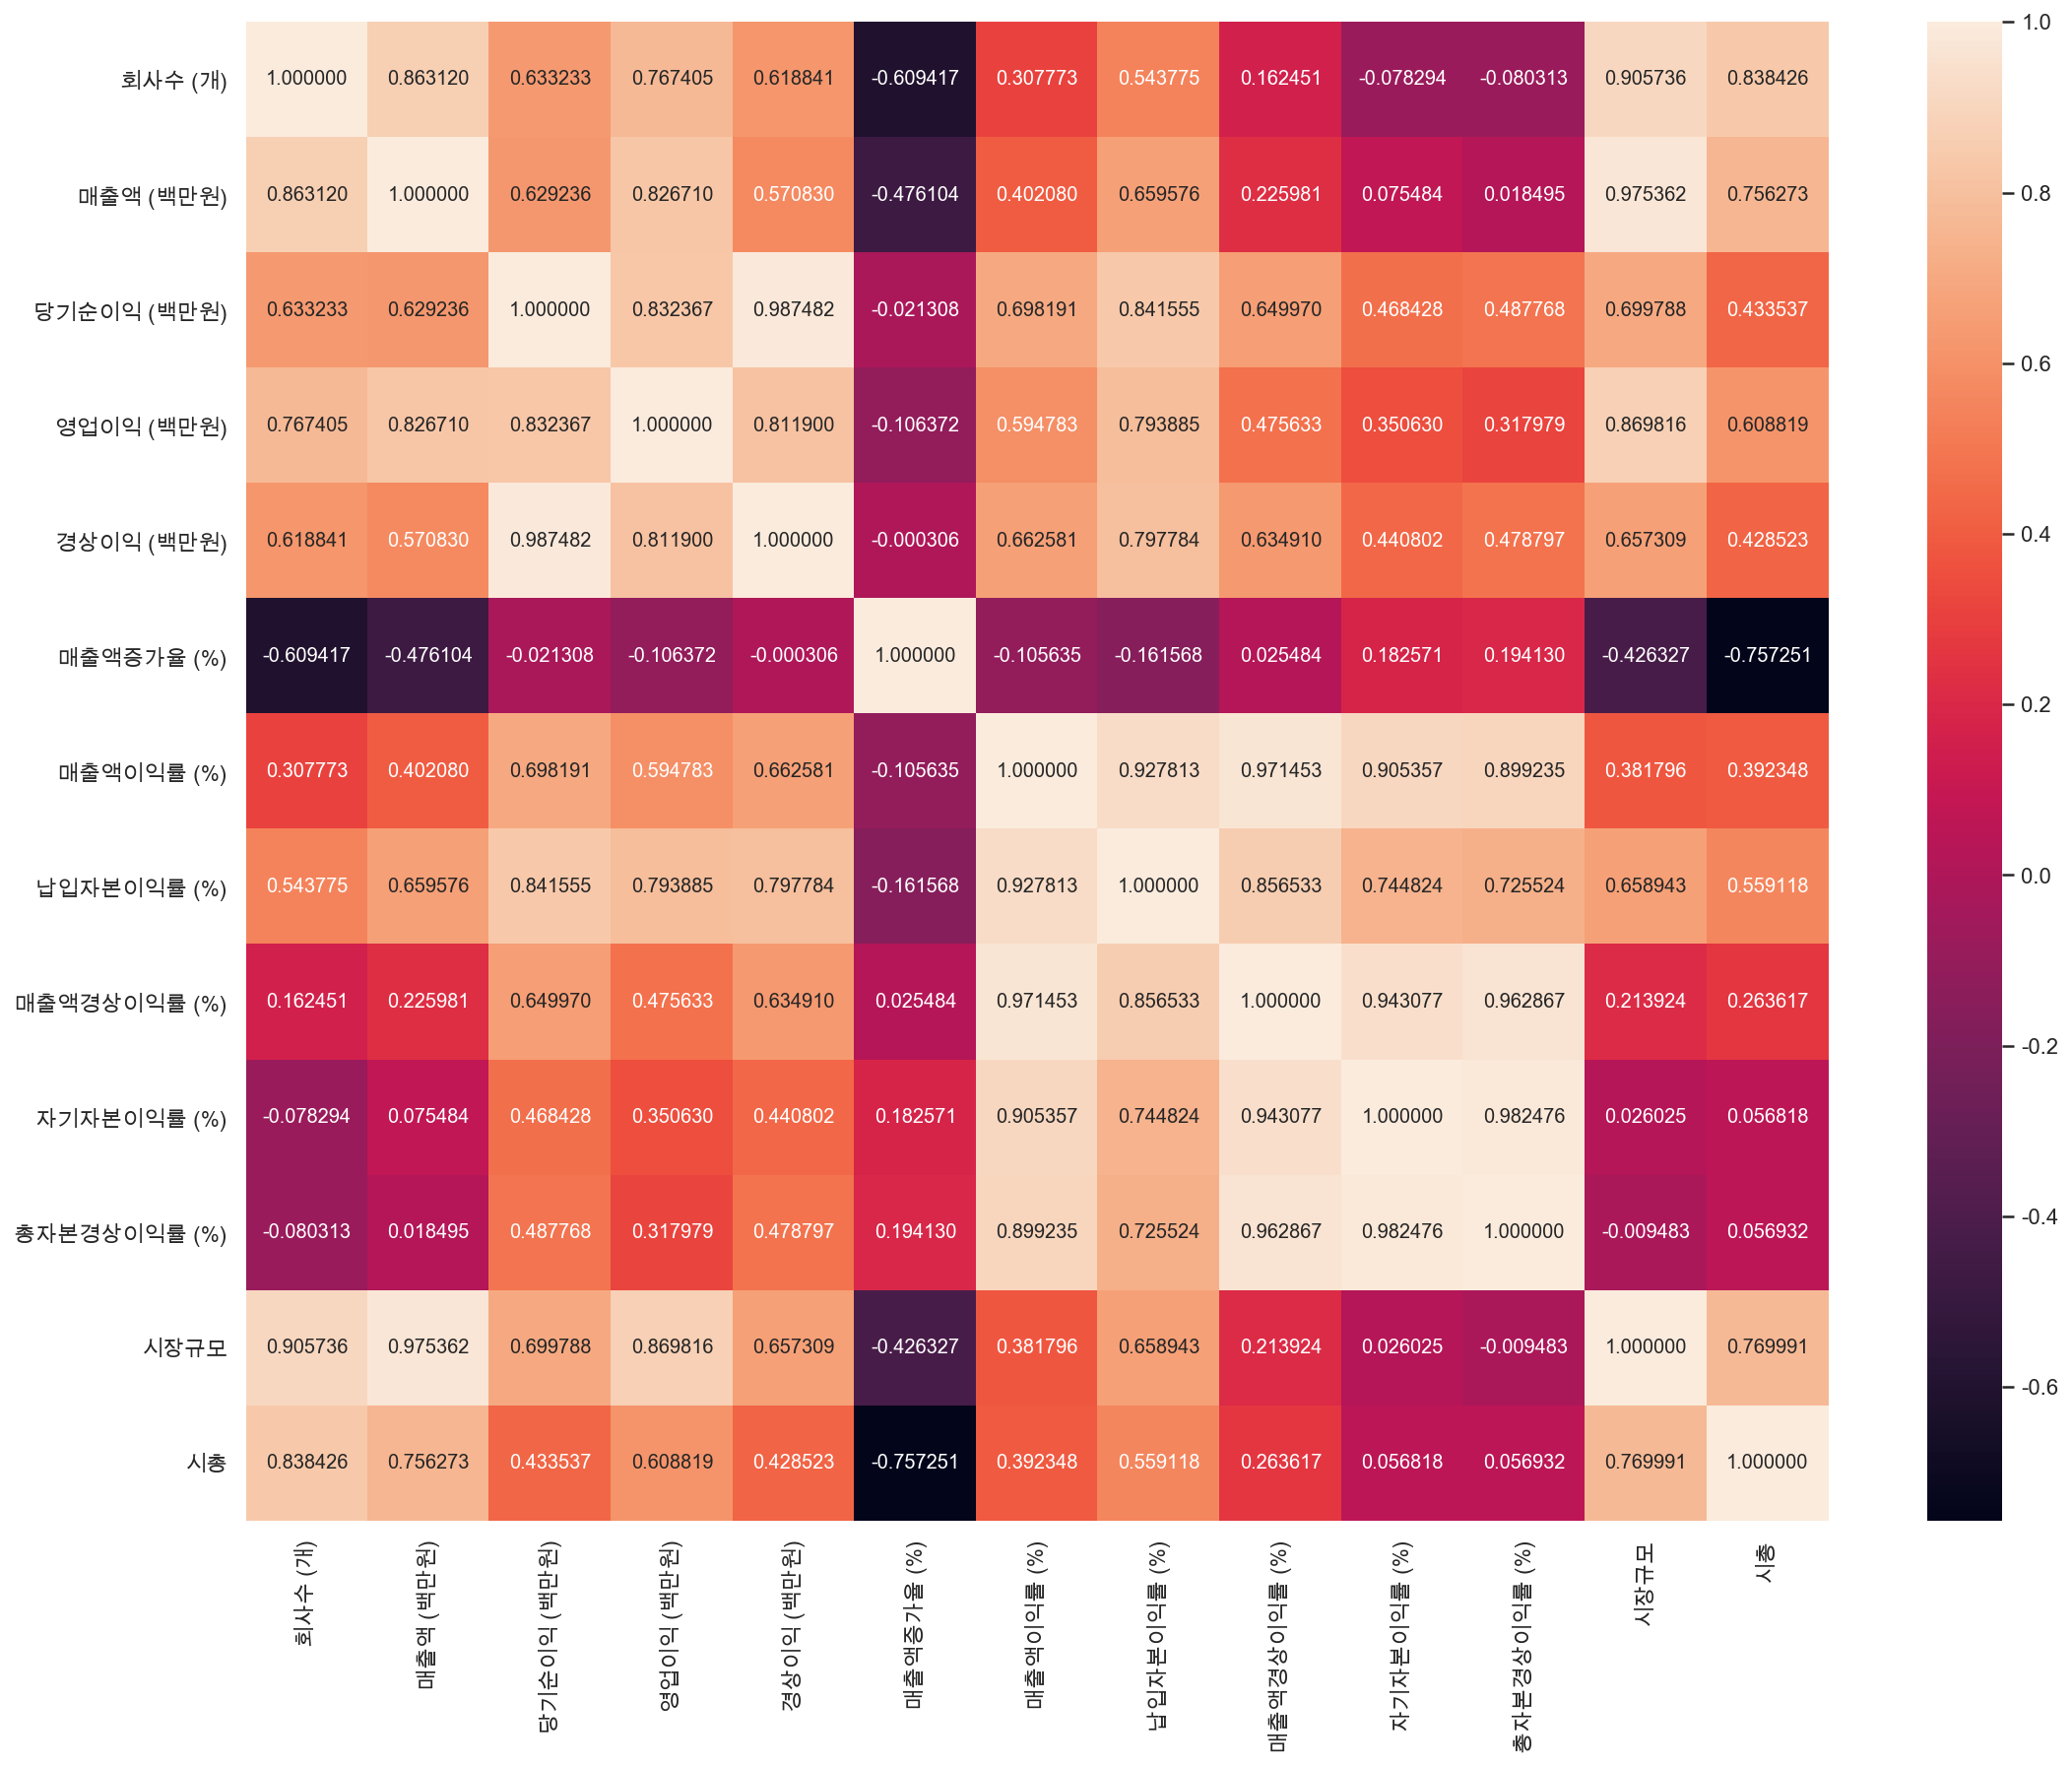

In [56]:
df_tmp = df_norm_to.corr()
plt.figure(figsize=(18,14))
sns.heatmap(df_tmp, annot=True, fmt="f")
plt.show()